In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import CollisionModule

In [2]:
import torch
from scipy import interpolate

In [5]:
DXsec_Al = np.load('./DXsec_Al_1e8.npy')

In [6]:
import DSMC_depoSimulator_generateWithtime

In [38]:
# cell model construct

#              - end
#            -
#          -
#        -
#      -
#    - start

# direction x, y; start (x, y, z)
def slide2D(film, start, end, direction, value):
    if direction == 'y':
        slit = np.linspace(start[2], np.abs(end[2] - start[2]), np.abs(end[1] - start[1]))
        print(slit)
        for i in range(np.abs(end[1] - start[1])):
            film[start[0]:end[0], start[1] + i, start[2]:start[2] + int(slit[i])] = value
            for j in range(int(slit[0]-slit[1])):
                film[start[0]:end[0], start[1] + i,start[2]+int(slit[i])+j] = 1/(value+1)*(slit[0]-slit[1]-j)
    elif direction == 'x':
        slit = np.linspace(start[2], np.abs(end[2] - start[2]), np.abs(end[0] - start[0]))
        for i in range(np.abs(end[0] - start[0])):
            film[start[0] + i, start[1]:end[1], start[2]:start[2] + int(slit[i])] = value
            for j in range(int(slit[0]-slit[1])):
                film[start[0] + i, start[1]:end[1], start[2]+int(slit[i])+j] = 1/(value+1)*(slit[0]-slit[1]-j)
    return film

In [39]:
film = np.zeros((50, 200, 180))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 80
left_side = 75
right_side = 75

film = slide2D(film=film, start=[0, 23, 20], end=[20, 33, 60], direction='y', value=10)

[20.         22.22222222 24.44444444 26.66666667 28.88888889 31.11111111
 33.33333333 35.55555556 37.77777778 40.        ]


In [9]:
film = np.zeros((50, 200, 180))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 80
left_side = 75
right_side = 75
# film[:, left_side:200-left_side, 0:height] = 10
# film[:, :23, 0:height] = 10
# film[:, 177:, 0:height] = 10


slit = np.linspace(70, 0, 8)
for i in range(7):
    film[:, 23+i, 0:int(slit[i])] = 10
    # film[:, 69+i, 0:int(slit[5-i])] = 10
    # film[:, 125+i, 0:int(slit[i])] = 10
    # film[:, 171+i, 0:int(slit[5-i])] = 10
    for j in range(10):
        film[:, 23+i, int(slit[i])+j] = 1/11*(10-j)
        # film[:, 69+i, int(slit[6-i])+j] = 1/11*(10-j)
        # film[:, 125+i, int(slit[i])+j] = 1/11*(10-j)
        # film[:, 171+i, int(slit[6-i])+j] = 1/11*(10-j)

In [11]:
slit

array([70., 60., 50., 40., 30., 20., 10.,  0.])

In [40]:
depo1 = torch.Tensor(np.logical_and(film[:, :, :] !=0, film[:, :, :] < 10)).to_sparse()
depo1 = depo1.indices().numpy().T

substrute = torch.Tensor(film[:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
depomesh = pv.PolyData(depo1)
depomesh["radius"] = np.ones(depo1.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
# p.add_mesh(depoglyphed, color='cyan')
p.add_mesh(subglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show_grid()
p.show()

c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\utilities\points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\filters\data_set.py:2386: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:62514/index.html?ui=P_0x1b025d6e8d0_10&reconnect=auto" class="pyvi…

In [7]:
film = np.zeros((50, 200, 180))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 80
left_side = 75
right_side = 75
film[:, left_side:200-left_side, 0:height] = 10
film[:, :23, 0:height] = 10
film[:, 177:, 0:height] = 10


slit = np.linspace(70, 0, 8)
for i in range(7):
    film[:, 23+i, 0:int(slit[i])] = 10
    film[:, 69+i, 0:int(slit[5-i])] = 10
    film[:, 125+i, 0:int(slit[i])] = 10
    film[:, 171+i, 0:int(slit[5-i])] = 10
    for j in range(10):
        film[:, 23+i, int(slit[i])+j] = 1/11*(10-j)
        film[:, 69+i, int(slit[6-i])+j] = 1/11*(10-j)
        film[:, 125+i, int(slit[i])+j] = 1/11*(10-j)
        film[:, 171+i, int(slit[6-i])+j] = 1/11*(10-j)

In [8]:
depo1 = torch.Tensor(np.logical_and(film[:, :, :] !=0, film[:, :, :] < 10)).to_sparse()
depo1 = depo1.indices().numpy().T

substrute = torch.Tensor(film[:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
depomesh = pv.PolyData(depo1)
depomesh["radius"] = np.ones(depo1.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='cyan')
p.add_mesh(subglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show_grid()
p.show()


c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\utilities\points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\filters\data_set.py:2386: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:62514/index.html?ui=P_0x1b06f2a6870_1&reconnect=auto" class="pyvis…

In [22]:
logname = 'DSMCTS60_trenchDepo_0701'
test = DSMC_depoSimulator_generateWithtime.depo(mirror=True,collision=False,velNormalize=True,pressure_pa=0.2, temperature=300, chamberSize=film.shape, DXsec=DXsec_Al,
                               param = [1.6, -0.7], TS = 0.3, N = center_depo2.shape[0], 
                               sub_xy=[0,0], film=film, n=1, cellSize=film.shape, 
                               celllength=1e-5, kdtreeN=5, tstep=1e-5, thickness=124,substrateTop=80,posGeneratorType='gen1', logname=logname)

deposit = test.depo_position_increase(125,  center_depo2[:, 3:], 2e-2, 0.3, 5)

l:\ysy\etching\Collision.py:31: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*self.q))**(wi-1/2)*gamma(5/2 - wi))
running: 100%|██████████████████████████████████████████████████████| 100/100 [35:42<00:00, 21.4s/B]
running:  43%|██████████████████████▊                              | 43.0/100 [12:49<17:00, 17.9s/B]

depo finish


In [21]:
np.save('For_etching_transport_TS60_deposit_0625_SMD', deposit[0])

In [4]:
deposit0 = np.load('./For_etching_transport_TS60_deposit_0604_4.npy')

In [30]:
print(deposit[1].shape)
print(deposit[2].shape)
print(deposit[2][:, 0].max())
print(deposit[2][:, 0].min())
print(deposit[2][:, 1].max())
print(deposit[2][:, 1].min())
print(deposit[2][:, 2].max())

(10291,)
(10292, 3)
0.0004968561158152218
-8.261215465415803e-06
0.001995020802015079
-4.1992351011038874e-06
0.0017675094293423833


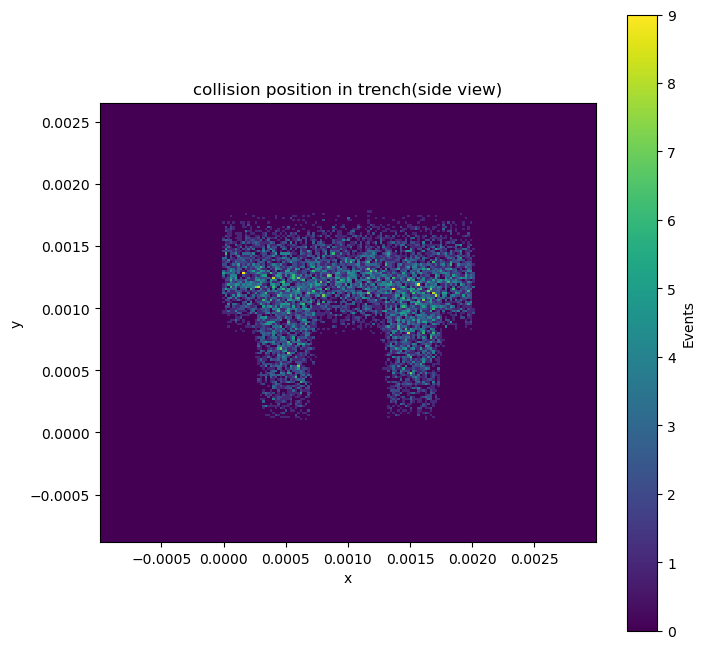

In [31]:
x_erosion_np = deposit[2][1:,1]
y_erosion_np = deposit[2][1:,2]

xbins = np.linspace(-deposit[2][:, 1].max()/2,deposit[2][:, 1].max()*1.5,200)
ybins = np.linspace(-deposit[2][:, 2].max()/2,deposit[2][:, 2].max()*1.5,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('collision position in trench(side view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

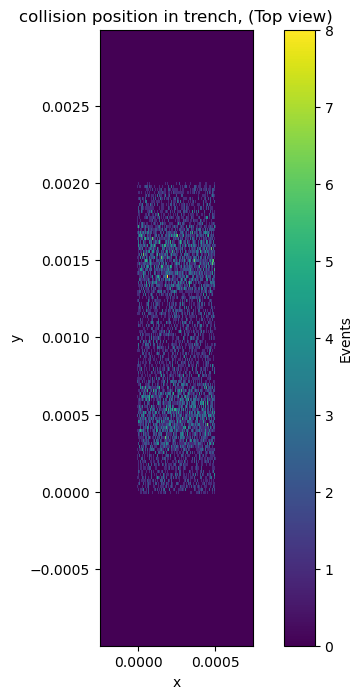

In [32]:
x_erosion_np = deposit[2][1:,0]
y_erosion_np = deposit[2][1:,1]

xbins = np.linspace(-deposit[2][:, 0].max()/2,deposit[2][:, 0].max()*1.5,200)
ybins = np.linspace(-deposit[2][:, 1].max()/2,deposit[2][:, 1].max()*1.5,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('collision position in trench, (Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [23]:
depo1 = torch.Tensor(deposit[0][:, :, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

substrute = torch.Tensor(deposit[0][:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
depomesh = pv.PolyData(depo1)
depomesh["radius"] = np.ones(depo1.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='cyan')
p.add_mesh(subglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show_grid()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
l:\program\Lib\site-packages\pyvista\core\filters\data_set.py:2320: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:56490/index.html?ui=P_0x1c9a95c0690_1&reconnect=auto" class="pyvis…

In [12]:
deposit0 = np.load('./For_etching_transport_TS60_deposit_0624_SMD.npy')

In [13]:
deposit0.shape

(50, 200, 180)

In [14]:
# deposit0 = deposit0[:, :, :]
# deposit0 = deposit[0][:, :, :]
etchfilm = np.zeros((deposit0.shape))


deposit_etch_10 = deposit0 == 10
b = np.where(deposit_etch_10 == True)
deposit_etch_20 = deposit0 == 20
c = np.where(deposit_etch_20 == True)

etchfilm[b] = -50
etchfilm[c] = -10

In [7]:
etchfilm.shape

(50, 200, 180)

In [8]:
import DSMC_etchingSimulator_linearInput

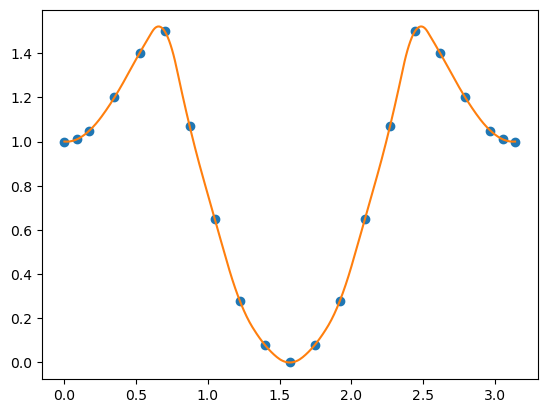

In [27]:
yield_hist = np.array([[1.0, 1.01, 1.05,  1.2,  1.4,  1.5, 1.07, 0.65, 0.28, 0.08,  0, \
                        0.08, 0.28,0.65,  1.07, 1.5, 1.4, 1.2, 1.05, 1.01, 1.0 ], \
                        [  0,  5,   10,   20,   30,   40,   50,   60,   70,   80, 90, \
                          100, 110, 120, 130, 140, 150, 160, 170, 175, 180]])
yield_hist[1] *= np.pi/180
yield_func = interpolate.interp1d(yield_hist[1], yield_hist[0], kind='quadratic')

xnew = np.arange(0, np.pi, 0.01)
# xnew = np.array([])
ynew = yield_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(yield_hist[1], yield_hist[0], 'o', xnew, ynew, '-')
plt.show()

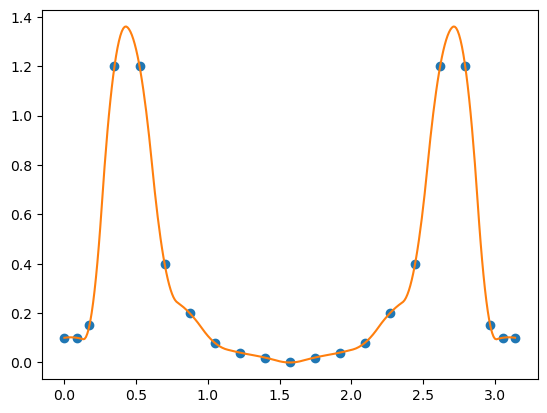

In [43]:
yield_hist = np.array([[0.1, 0.1, 0.15,  1.2,  1.2,  0.40, 0.2, 0.08, 0.04, 0.02,  0, \
                        0.02, 0.04, 0.08, 0.2, 0.40, 1.2, 1.2, 0.15, 0.1, 0.1], \
                        [  0,  5,   10,   20,   30,   40,   50,   60,   70,   80, 90, \
                         100, 110, 120, 130, 140, 150, 160, 170, 175, 180]])
yield_hist[1] *= np.pi/180
yield_func = interpolate.interp1d(yield_hist[1], yield_hist[0], kind='quadratic')

xnew = np.arange(0, np.pi, 0.01)
# xnew = np.array([])
ynew = yield_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(yield_hist[1], yield_hist[0], 'o', xnew, ynew, '-')
plt.show()

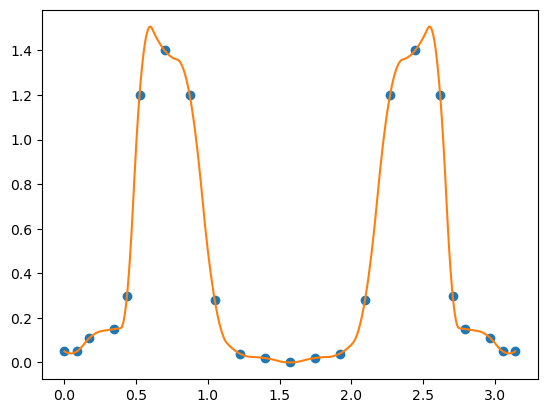

In [9]:
yield_hist = np.array([[0.05, 0.05, 0.11,  0.15, 0.3,  1.2,  1.40, 1.2, 0.28, 0.04, 0.02,  0, \
                        0.02, 0.04, 0.28, 1.2, 1.40, 1.2, 0.3,  0.15, 0.11, 0.05, 0.05], \
                        [  0,  5,   10,   20, 25,  30,   40,   50,   60,   70,   80, 90, \
                         100, 110, 120, 130, 140, 150, 155, 160, 170, 175, 180]])
yield_hist[1] *= np.pi/180
yield_func = interpolate.interp1d(yield_hist[1], yield_hist[0], kind='quadratic')

xnew = np.arange(0, np.pi, 0.01)
# xnew = np.array([])
ynew = yield_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(yield_hist[1], yield_hist[0], 'o', xnew, ynew, '-')
plt.show()

(2, 23)


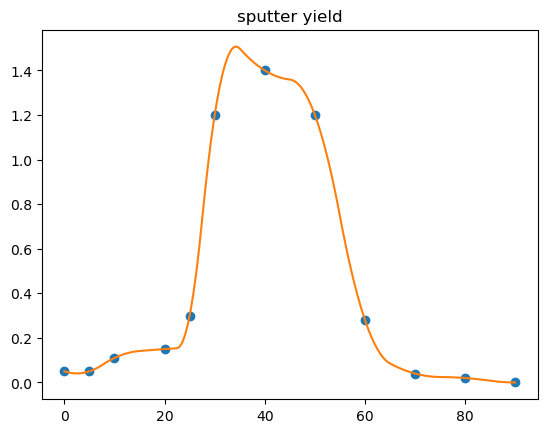

In [25]:
yield_hist = np.array([[0.05, 0.05, 0.11,  0.15, 0.3,  1.2,  1.40, 1.2, 0.28, 0.04, 0.02,  0, \
                        0.02, 0.04, 0.28, 1.2, 1.40, 1.2, 0.3,  0.15, 0.11, 0.05, 0.05], \
                        [  0,  5,   10,   20, 25,  30,   40,   50,   60,   70,   80, 90, \
                         100, 110, 120, 130, 140, 150, 155, 160, 170, 175, 180]])

print(yield_hist.shape)
yield_hist[1] *= np.pi/180
yield_func = interpolate.interp1d(yield_hist[1], yield_hist[0], kind='quadratic')

xnew = np.arange(0, np.pi/2, 0.01)
# xnew = np.array([])
ynew = yield_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(yield_hist[1][:12]/(np.pi/180), yield_hist[0][:12], 'o', xnew/(np.pi/180), ynew, '-')
plt.title('sputter yield')
plt.show()

In [15]:
logname = 'DSMCTS60_etching_0624'
testEtch = DSMC_etchingSimulator_linearInput.etching(mirror=True, pressure_pa=0.001, temperature=300, chamberSize=etchfilm.shape, DXsec=DXsec_Al,
                                         center_with_direction=np.array([[35,100,75]]), 
                                         range3D=np.array([[0, 70, 0, 100, 0, 150]]), InOrOut=[1], yield_hist=yield_hist,
                                        param = [1.6, -0.7], TS = 0.3, N = 500000, 
                                        sub_xy=[0,0], film=etchfilm, n=101, cellSize=etchfilm.shape, 
                                        celllength=1e-5, kdtreeN=5, tstep=1e-8,
                                        thickness=124,substrateTop=80,posGeneratorType='top', logname=logname)
etching = testEtch.depo_position_increase_cosVel(125,  500000, 1e-5, 0.5, 10)

l:\ysy\etching\Collision.py:31: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*self.q))**(wi-1/2)*gamma(5/2 - wi))
running: 100%|██████████████████████████████████████████████████████| 100/100 [15:17<00:00, 9.17s/B]


In [16]:
etched = torch.Tensor(deposit0[:, :, :]==20).to_sparse()
etched = etched.indices().numpy().T

substrute = torch.Tensor(etching[0][:, :, :]==-10).to_sparse()
substrute = substrute.indices().numpy().T

trench = torch.Tensor(etching[0][:, :, :]==-50).to_sparse()
trench = trench.indices().numpy().T

depomesh = pv.PolyData(etched)
depomesh["radius"] = np.ones(etched.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

trenchmesh = pv.PolyData(trench)
trenchmesh["radius"] = np.ones(trench.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)
trenchglyphed = trenchmesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='pink')
p.add_mesh(subglyphed, color='cyan')
p.add_mesh(trenchglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
l:\program\Lib\site-packages\pyvista\core\filters\data_set.py:2320: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:55777/index.html?ui=P_0x1a9882c0bd0_1&reconnect=auto" class="pyvis…

In [17]:
# etched = torch.Tensor(deposit0[:, :, :]==20).to_sparse()
# etched = etched.indices().numpy().T

substrute = torch.Tensor(etching[0][:, :, :]==-10).to_sparse()
substrute = substrute.indices().numpy().T

trench = torch.Tensor(etching[0][:, :, :]==-50).to_sparse()
trench = trench.indices().numpy().T

# depomesh = pv.PolyData(etched)
# depomesh["radius"] = np.ones(etched.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

trenchmesh = pv.PolyData(trench)
trenchmesh["radius"] = np.ones(trench.shape[0])*0.5

# Progress bar is a new feature on master branch
# depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)
trenchglyphed = trenchmesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
# p.add_mesh(depoglyphed, color='pink')
p.add_mesh(subglyphed, color='cyan')
p.add_mesh(trenchglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
l:\program\Lib\site-packages\pyvista\core\filters\data_set.py:2320: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:55777/index.html?ui=P_0x1a988236d10_2&reconnect=auto" class="pyvis…

In [30]:
np.save('./TScompare/TS60_DSMC_etching_0624_SMD', etching[0])

In [40]:
edge_indices = np.logical_or(a[:,0] < 0.165, a[:,0] > 0.195)
edge_indices |= np.logical_or(a[:,1] < -0.015, a[:,1] > 0.015)
edge_indices |= np.array(a[:,2] > 0.2)
if np.any(edge_indices):
    edge_depo = a[~edge_indices]

print(edge_depo.shape)

(23388, 6)


In [41]:
for i in range(6):
    edge_depo = np.concatenate((edge_depo, edge_depo), axis=0)

print(edge_depo.shape)

(1496832, 6)


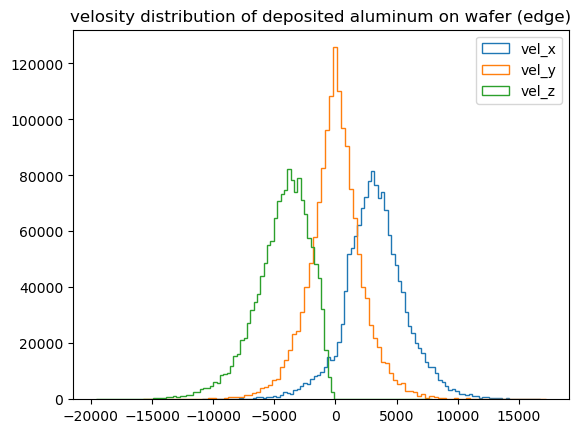

In [56]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(edge_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(edge_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(edge_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [58]:
edge_depo2 = np.zeros_like(edge_depo)
edge_depo2[:,3] = edge_depo[:,4]
edge_depo2[:,4] = edge_depo[:,3]
edge_depo2[:,5] = edge_depo[:,5]

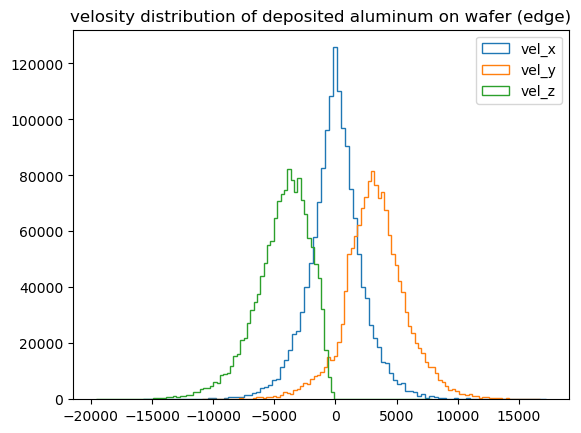

In [59]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(edge_depo2[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(edge_depo2[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(edge_depo2[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [48]:
np.random.shuffle(edge_depo)

In [49]:
edge_depo.shape

(1496832, 6)

In [61]:
logname = 'DSMCTS60_trenchDepo_0624_edge'
test = DSMC_depoSimulator_generateWithtime.depo(mirror=True,pressure_pa=0.2, temperature=300, chamberSize=film.shape, DXsec=DXsec_Al,
                               param = [1.6, -0.7], TS = 0.3, N = edge_depo2.shape[0], 
                               sub_xy=[0,0], film=film, n=1, cellSize=film.shape, 
                               celllength=1e-5, kdtreeN=5, tstep=5e-10, thickness=117,substrateTop=80,posGeneratorType='gen1', logname=logname)

deposit = test.depo_position_increase(125,  edge_depo2[:, 3:], 2e-6, 0.3, 30)

l:\ysy\etching\Collision.py:31: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*self.q))**(wi-1/2)*gamma(5/2 - wi))
running:   0%|                                                            | 0.00/100 [00:00<?, ?B/s]

running:  91%|██████████████████████████████████████████████▍    | 91.0/100 [1:07:15<06:39, 44.3s/B]

depo finish


In [63]:
np.save('./TScompare/TS60_DSMC_edge_SMD_0624', deposit[0])

In [62]:
depo1 = torch.Tensor(deposit[0][:, :, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

substrute = torch.Tensor(deposit[0][:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
depomesh = pv.PolyData(depo1)
depomesh["radius"] = np.ones(depo1.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='cyan')
p.add_mesh(subglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show_grid()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
l:\program\Lib\site-packages\pyvista\core\filters\data_set.py:2320: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:55777/index.html?ui=P_0x1aa62deb790_9&reconnect=auto" class="pyvis…